<a href="https://colab.research.google.com/github/victsin/pythonProject/blob/master/employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries for the analysis

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px

import csv file, see shape, calculate median and make the final dataframe for analysis

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2-employees.csv')

In [4]:
df.shape

(311, 32)

In [5]:
salary_median = df['Salary'].median()
print(salary_median)

62810.0


In [6]:
final_df = df[(df['Salary'] > salary_median) & (df['EmpSatisfaction'] >= 3) &
    ((df['PerformanceScore'] == 'Exceeds') | (df['PerformanceScore'] == 'Fully Meets')) &
    ((df['Department'] == 'Production') | (df['Department'] == 'IT/IS'))
]

In [7]:
final_df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,0,17
12,"Barbossa, Hector",10012,0,2,1,1,3,4,1,92328,...,IT/IS,Simon Roup,4.0,Diversity Job Fair,Exceeds,4.28,4,5,0,9
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,...,IT/IS,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,0,8
25,"Booth, Frank",10199,0,0,1,4,3,3,0,103613,...,IT/IS,Simon Roup,4.0,LinkedIn,Fully Meets,3.50,5,7,0,2
39,"Carr, Claudia N",10082,0,0,0,2,3,3,0,100031,...,IT/IS,Simon Roup,4.0,LinkedIn,Fully Meets,5.00,5,6,0,7


check for missing values

In [8]:
print(final_df.isnull().sum().sum())

0


descriptive statistics for all numeric columns

In [9]:
final_df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.000000
mean,10145.418605,0.465116,0.697674,0.581395,2.023256,3.0,3.116279,0.046512,101774.883721,0.232558,14.325581,4236.581395,6.511628,4.249767,4.023256,5.953488,0.0,10.534884
std,78.277356,0.504685,0.802819,0.499169,1.550551,0.0,0.324353,0.213083,30051.692491,0.427463,8.408388,11615.388287,3.376192,0.606522,0.858802,0.998892,0.0,5.766689
min,10010.000000,0.000000,0.000000,0.000000,1.000000,3.0,3.000000,0.000000,65707.000000,0.000000,4.000000,1420.000000,2.000000,3.010000,3.000000,4.000000,0.0,1.000000
25%,10083.500000,0.000000,0.000000,0.000000,1.000000,3.0,3.000000,0.000000,86296.500000,0.000000,8.000000,1937.500000,4.000000,3.815000,3.000000,5.000000,0.0,7.000000
50%,10156.000000,0.000000,1.000000,1.000000,1.000000,3.0,3.000000,0.000000,93206.000000,0.000000,13.000000,2127.000000,5.000000,4.300000,4.000000,6.000000,0.0,10.000000
75%,10216.000000,1.000000,1.000000,1.000000,3.000000,3.0,3.000000,0.000000,108613.000000,0.000000,22.000000,2406.000000,7.000000,4.700000,5.000000,7.000000,0.0,16.000000
max,10273.000000,1.000000,4.000000,1.000000,5.000000,3.0,4.000000,1.000000,220450.000000,1.000000,30.000000,78230.000000,13.000000,5.000000,5.000000,8.000000,0.0,20.000000


In [10]:
final_df['Salary'].describe()

count        43.000000
mean     101774.883721
std       30051.692491
min       65707.000000
25%       86296.500000
50%       93206.000000
75%      108613.000000
max      220450.000000
Name: Salary, dtype: float64

visualization

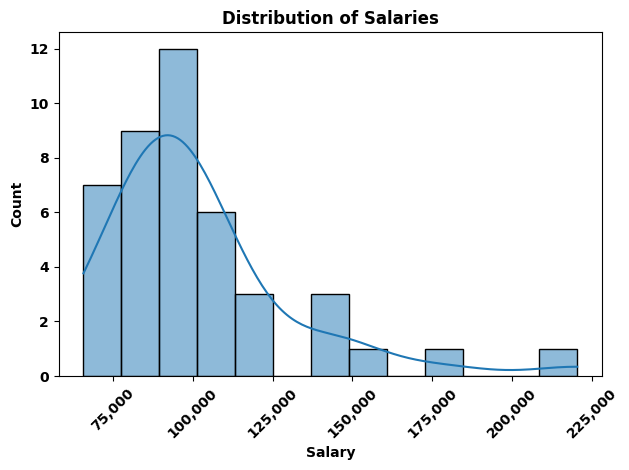

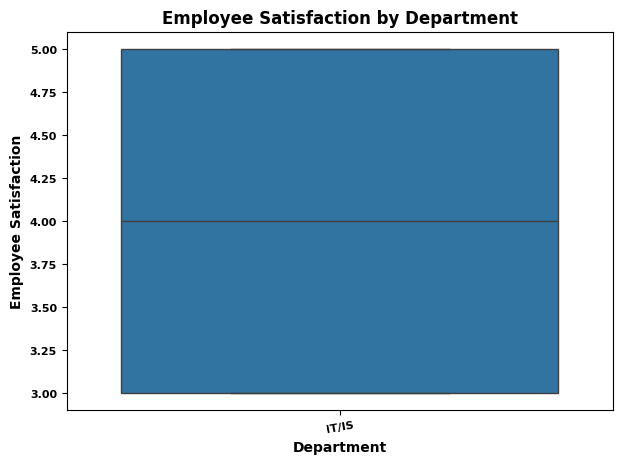

In [64]:
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

sns.histplot(final_df['Salary'], kde=True)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()

sns.boxplot(x='Department', y='EmpSatisfaction', data=final_df)
plt.title('Employee Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Employee Satisfaction')
plt.xticks(rotation=10)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [66]:
df = final_df

In [68]:
df['unique_id'] = range(1, len(df) + 1)

color_map = px.colors.qualitative.Set3

num_employees = len(df)
if num_employees > len(color_map):
    color_map = color_map * (num_employees // len(color_map)) + color_map[:num_employees % len(color_map)]

fig = px.scatter(df,
                 x='Salary',
                 y='EmpSatisfaction',
                 color='unique_id',
                 color_discrete_sequence=color_map,
                 hover_data=['Employee_Name'])


fig.update_layout(showlegend=False)

fig.update_layout(
    title={'text': 'Salary vs. Employee Satisfaction', 'font': {'family': 'Arial Bold', 'size': 20}},
    xaxis_title="Salary",
    yaxis_title="EmpSatisfaction",
    font=dict(family="Arial Bold", size=12, color="RebeccaPurple")
)

fig.show()

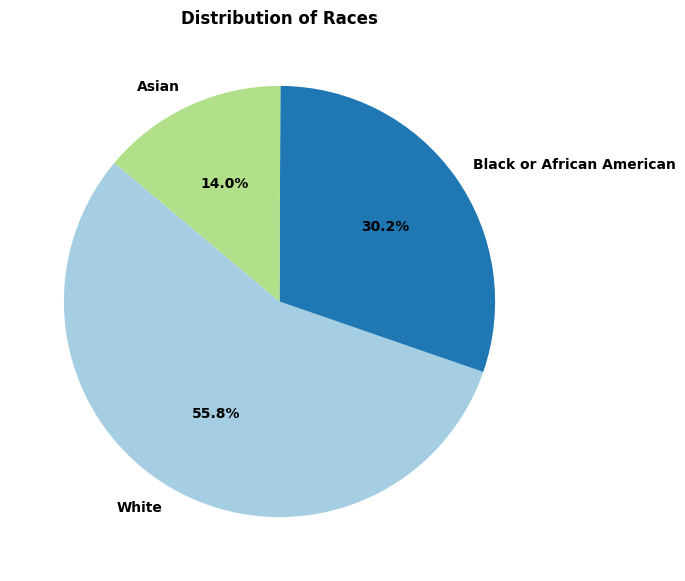

In [73]:
race_counts = df['RaceDesc'].value_counts()

plt.figure(figsize=(10, 7))

colors = plt.cm.Paired(range(len(race_counts)))

plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontweight': 'bold'})

# Set title with bold font
plt.title('Distribution of Races', fontweight='bold')

plt.show()